In [ ]:
! pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 6.2 MB/s eta 0:00:00


In [ ]:
! pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 18.9 MB/s eta 0:00:00


In [ ]:
!pip install bert_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [1]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 37.1 MB/s eta 0:00:00


In [ ]:
! pip install faiss-gpu


ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


In [ ]:
import os
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFaceHub
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.chains.question_answering import  load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document
import pypdf
from langchain_groq import ChatGroq

In [ ]:
import os
os.environ["GROQ_API_KEY"] = "MY token"


In [ ]:


def load_data(path):
  loader = PyPDFLoader(path)
  docs = loader.load()
  splitter = RecursiveCharacterTextSplitter(chunk_size = 500 , chunk_overlap=50 )
  return splitter.split_documents(docs)



def embedding_data(docs):
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
  return FAISS.from_documents(docs,embedding_model)


def build_qa_system(faiss_index):
  retriever = faiss_index.as_retriever(search_type = "similarity", k=3)
  llm = ChatGroq(
      api_key=os.getenv("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"),
      model_name="llama3-8b-8192")
  qa_chain = RetrievalQA.from_chain_type( llm = llm , retriever = retriever )
  return qa_chain


def main():
    print("🔄 Embedding Ancient Hestorical documents...")

    docs = load_data("/content/AuraDataset.pdf")
    faiss_index = embedding_data(docs)

    qa_chain = build_qa_system(faiss_index)

    while True:
        query = input("\n❓ Ask a question (or type 'exit' to quit): ")

        if query.lower() == "exit":
            print("👋 Exiting...")
            break

        print("💭 Generating answer...")
        result = qa_chain.run(query)

        print(f"💡 Answer: {result}")

if __name__ == "__main__":
    main()


🔄 Embedding Ancient Hestorical documents...

❓ Ask a question (or type 'exit' to quit): What two tragic events happened to Akhenaten’s royal family shortly after the delegates left Akhetaten, and where were the deceased buried?
💭 Generating answer...
💡 Answer: According to the text, shortly after the delegates left Akhetaten, Akhenaten's daughter Meketaten died at the tender age of seven, and then followed by the king's beloved mother, Tiye. Both were buried in the royal tomb carved into the hillside in a lonely desert valley, eight miles beyond the city.

❓ Ask a question (or type 'exit' to quit): What was the state of the temples and shrines during the reign of the king, and how did the gods respond to the distress of the land?
💭 Generating answer...
💡 Answer: According to the text, during the reign of the king, the temples of the gods and goddesses from Abu to the delta marshes had fallen into ruin. Their shrines had fallen into decay, having become mounds thick with weeds. The land

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu
from bert_score import score


def cosine_similarity_score(answer_model, answer_actual):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([answer_model, answer_actual])
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return cosine_sim[0][0]

# BLEU Score Function
def bleu_score(answer_model, answer_actual):
    reference = [answer_actual.split()]
    candidate = answer_model.split()
    score = sentence_bleu(reference, candidate)
    return score


def bert_score_evaluation(answer_model, answer_actual, lang="en"):
    P, R, F1 = score([answer_model], [answer_actual], lang=lang)
    return {
        "Precision": round(P[0].item(), 4),
        "Recall": round(R[0].item(), 4),
        "F1 Score": round(F1[0].item(), 4)
    }




model_answ1="According to the text, shortly after the delegates left Akhetaten, Akhenaten's daughter Meketaten died at the tender age of seven, and then followed by the king's beloved mother, Tiye. Both were buried in the royal tomb carved into the hillside in a lonely desert valley, eight miles beyond the city."
actual_answ1= "Divine favor had its limits. The delegates had barely left Akhetaten before tragedy struck the royal family. Akhenaten’s second daughter, Meketaten, died at the tender age of seven, followed not long afterward by the king’s beloved mother, Tiye. Both were interred, as Akhenaten had decreed, in the royal tomb carved into the hillside in a lonely desert valley on the eastern horizon, eight miles beyond the city. Graphic scenes of mourning capture the mood of the grief-stricken relatives."


print( cosine_similarity_score(model_answ1,actual_answ1))
print( bleu_score(model_answ1,actual_answ1))
print(bert_score_evaluation(model_answ1,actual_answ1))

0.736801632228865
0.2832401472065765


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'Precision': 0.9548, 'Recall': 0.9172, 'F1 Score': 0.9356}


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


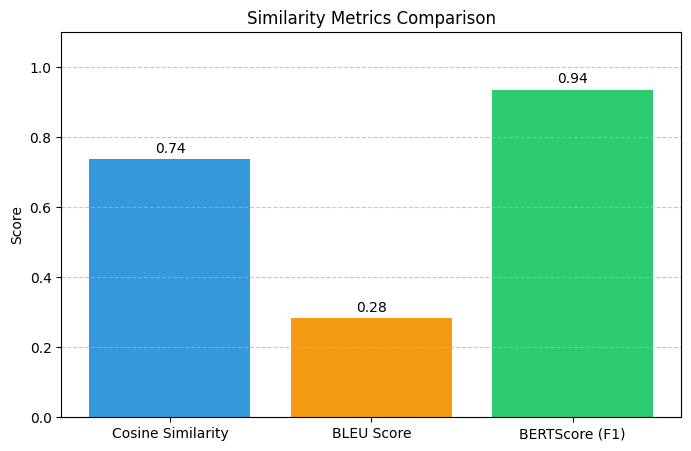

In [ ]:
import matplotlib.pyplot as plt

cosine_score =  cosine_similarity_score(model_answ1,actual_answ1)
bleu =  bleu_score(model_answ1,actual_answ1)
bertscore_f1 = bert_score_evaluation(model_answ1,actual_answ1)["F1 Score"]


scores = [cosine_score, bleu, bertscore_f1]
labels = ['Cosine Similarity', 'BLEU Score', 'BERTScore (F1)']
colors = ['#3498db', '#f39c12', '#2ecc71']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Similarity Metrics Comparison')
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
